# 📦 Phase 1 Proposal

in this exercise, I gained a dataset which contains information about the survivors of the titanic incident. This dataset was provided by the canvas exercise.

from this dataset we have certain features:

1. pnumber: passanger number
2. pclass: class of the passenger ranking from upper middle and lower
3. survived: yes(1) or no(0)
4. name: name of the participant
5. age: age of the passanger
6. embarked: from where they shipped
7. home.dest: where they were headed (not sure)
8. room: room id
9. ticket: ticket id
10. boat: boat id
11. sex: male or female



# Phase 2 Provisioning


In [265]:
import sklearn
import pandas
import seaborn

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pandas.__version__)            # 1.5.1
print("seaborn version:", seaborn.__version__)          # 0.12.1

scikit-learn version: 1.1.2
pandas version: 1.5.1
seaborn version: 0.12.1


I start of by printing out some random samples of the dataset and we quickly notice some missing values in certain features. In the tutorial exercies, it is proposed to simply remove these features altogether. With this notebook, I want to see how far I can get without this destructive approach.

In [266]:
df = pandas.read_csv("Titanic.csv")
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pnumber    1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


,pnumber,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1264,1265,3rd,0,"Turkula, Mrs Hedvig",NaN,NaN,NaN,NaN,NaN,NaN,female
1073,1074,3rd,0,"Nysten, Miss Anna",NaN,NaN,NaN,NaN,NaN,NaN,female
1055,1056,3rd,1,"Najib, Miss Adele Kiamie",NaN,NaN,NaN,NaN,NaN,NaN,female
1193,1194,3rd,0,"Scanlan, Mr James",NaN,NaN,NaN,NaN,NaN,NaN,male
249,250,1st,1,"Stephenson, Mrs Walter Bertram (Martha Eustis)",52.0,NaN,"Haverford, PA",NaN,NaN,4,female


Since there is a lot of missing data we can do the following: Use a new or add new data sources or process the already given data.

for the sake of working with missing values I will do the latter.

Before I start with "fixing" the missing data, I first assess which data is relevant in predicting the survival rate of the passenger. I will first of drop all irrelevant features such as the pnumber, name as they are random and don't improve survival rate.

I also think your destination does not impact the survival rate since all of them reached the iceberg. The boat id is also related to the boat which they took as a safety backup boat which should be higly related to the survivability rate. I am not sure of this feature as there is no further explenation of this data and don't want to incorperate the unkown.


In [267]:
df.drop(["name", "pnumber","ticket", "home.dest", "boat"], axis=1, inplace=True)

df

,pclass,survived,age,embarked,room,sex
0,1st,1,29.0000,Southampton,B-5,female
1,1st,0,2.0000,Southampton,C26,female
2,1st,0,30.0000,Southampton,C26,male
3,1st,0,25.0000,Southampton,C26,female
4,1st,1,0.9167,Southampton,C22,male
...,...,...,...,...,...,...
1308,3rd,0,NaN,NaN,NaN,male
1309,3rd,0,NaN,NaN,NaN,male
1310,3rd,0,NaN,NaN,NaN,male
1311,3rd,0,NaN,NaN,NaN,female


age may also been a relevant factor since the passengers are all human and have certain cultural and sociatel norms.

for the age it was noted that the value can be noted as a fractional if les than 1 which explains the odd values here in there. we can fix this by multiplying these values by 100.
To fill in the missing values we can do the following methods:

1. imputation with mean or median
2. use a model that predicts the missing age (or make my own model)

In [268]:
df.loc[df['age'] < 1, 'age'] *= 100

df['age'].fillna(df['age'].mean(), inplace=True)

from the previous model it was relevant to use the feature "embarked" as it had a positive influence to be embarked from a certain place. Eventough it seems irrelevant it might have had impact on the passenger as they might have been "more on edge" or sick of the ride. this is all but speculation.

for the feature embarked we can do the following options

1. imputate the data with a default value or most frequent value
2. use another model to predict missing values



In [269]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# df = pandas.get_dummies(df, columns=['embarked'])

df["embarked"] = df["embarked"].map({"Cherbourg":1, "Queenstown":2, "Southampton":3}).astype(int)

for the room in which the passengers were hosted, I also find this to be relevent information since it may have impacted either the awaereness of the passengers during the accident or hindered this person to reach the boat lessening his survivability rate. 

some tutorials noted that they don't have information on where the rooms were hosted, but using internet we can find some diagrams of how the titanic was split up in. Now that we know where each room can be found at we can use this in our model.

to fill out the missing values, I want to distribute the classess evenly since reports show that the titanic was carrying their on or even above their maximum capacity.

since this data is non numerical, I will have to use a python module to do this for me.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png" width=300px>


In [270]:
# strip the first character from the room column
df['room'] = df['room'].apply(lambda x: x[0] if isinstance(x, str) and x[0].isalpha() else None)


# fill the missing values with the next value in the cycle evenly distributed
import itertools
unique_rooms = df['room'].dropna().unique()
cycle_rooms = itertools.cycle(unique_rooms)
df['room'] = df['room'].fillna(next(cycle_rooms))

# convert the room column to a categorical column
# df = pandas.get_dummies(df, columns=['room'])

df["room"] = df["room"].map({"A":1, "B":2, "C":3, "D":4, "E": 5, "F": 6})
# df["room"].fillna(0, inplace=True)
df["room"] = df["room"].astype(int)
df

,pclass,survived,age,embarked,room,sex
0,1st,1,29.00000,3,2,female
1,1st,0,2.00000,3,3,female
2,1st,0,30.00000,3,3,male
3,1st,0,25.00000,3,3,female
4,1st,1,91.67000,3,3,male
...,...,...,...,...,...,...
1308,3rd,0,31.80673,3,2,male
1309,3rd,0,31.80673,3,2,male
1310,3rd,0,31.80673,3,2,male
1311,3rd,0,31.80673,3,2,female


The pclass is the class of the passenger and is highly relevant since these passengers are treated more carefuly increasing their survival rate.
for the pclass I simply changed the feature in to a numerical by category

In [271]:
# df= pandas.get_dummies(df, columns=['pclass'])

# set value manually, get dummies creates new collumns
df["pclass"] = df["pclass"].map({"1st":1, "2nd":2, "3rd":3}).astype(int)

sex is also important since it can attribute into cases where females are treated "better" increasing their survival odds. we can simply change this to a category as well.

In [272]:
# df = pandas.get_dummies(df, columns=['sex'])

# set value manually, get dummies creates new collumns
df["sex"] = df["sex"].map({"male":0, "female":1}).astype(int)

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1313 non-null   int32  
 1   survived  1313 non-null   int64  
 2   age       1313 non-null   float64
 3   embarked  1313 non-null   int32  
 4   room      1313 non-null   int32  
 5   sex       1313 non-null   int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 41.2 KB


,pclass,survived,age,embarked,room,sex
0,1,1,29.00000,3,2,1
1,1,0,2.00000,3,3,1
2,1,0,30.00000,3,3,0
3,1,0,25.00000,3,3,1
4,1,1,91.67000,3,3,0
...,...,...,...,...,...,...
1308,3,0,31.80673,3,2,0
1309,3,0,31.80673,3,2,0
1310,3,0,31.80673,3,2,0
1311,3,0,31.80673,3,2,1


## plotting


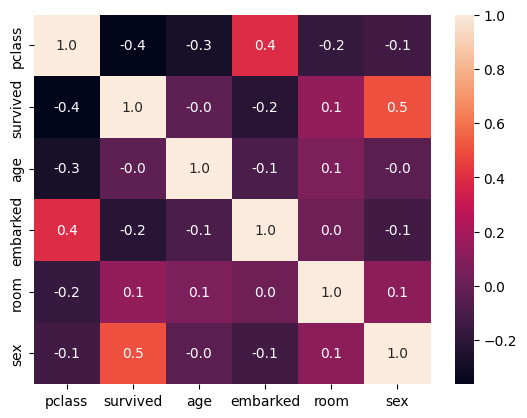

In [273]:
correlations = df.corr()
plot = seaborn.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

from this dataset we can see that just like the other example exercise that a lower pclass rank and a male sex had negative accoessation with your survivability rate. being a female from a high pclass rank increases your survivability to the max.

# Phase 3 Predictions

In [274]:
features = 	["age", 
            "embarked",
             "pclass",
             "sex",
             "room",]
target = "survived"

X = df[features]
y = df[target]

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 1313 observations, of which 1050 are now in the train set, and 263 in the test set.


In [276]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8212927756653993


# Evaluation

[Text(0, 0, 'age'),
 Text(1, 0, 'embarked'),
 Text(2, 0, 'pclass'),
 Text(3, 0, 'sex'),
 Text(4, 0, 'room')]

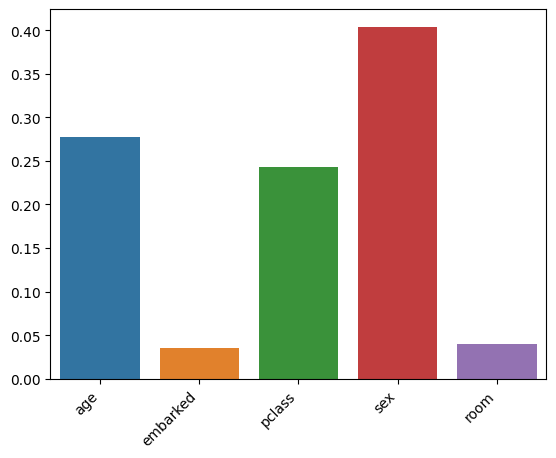

In [277]:
plot = seaborn.barplot(y=model.feature_importances_, x=features)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha="right")


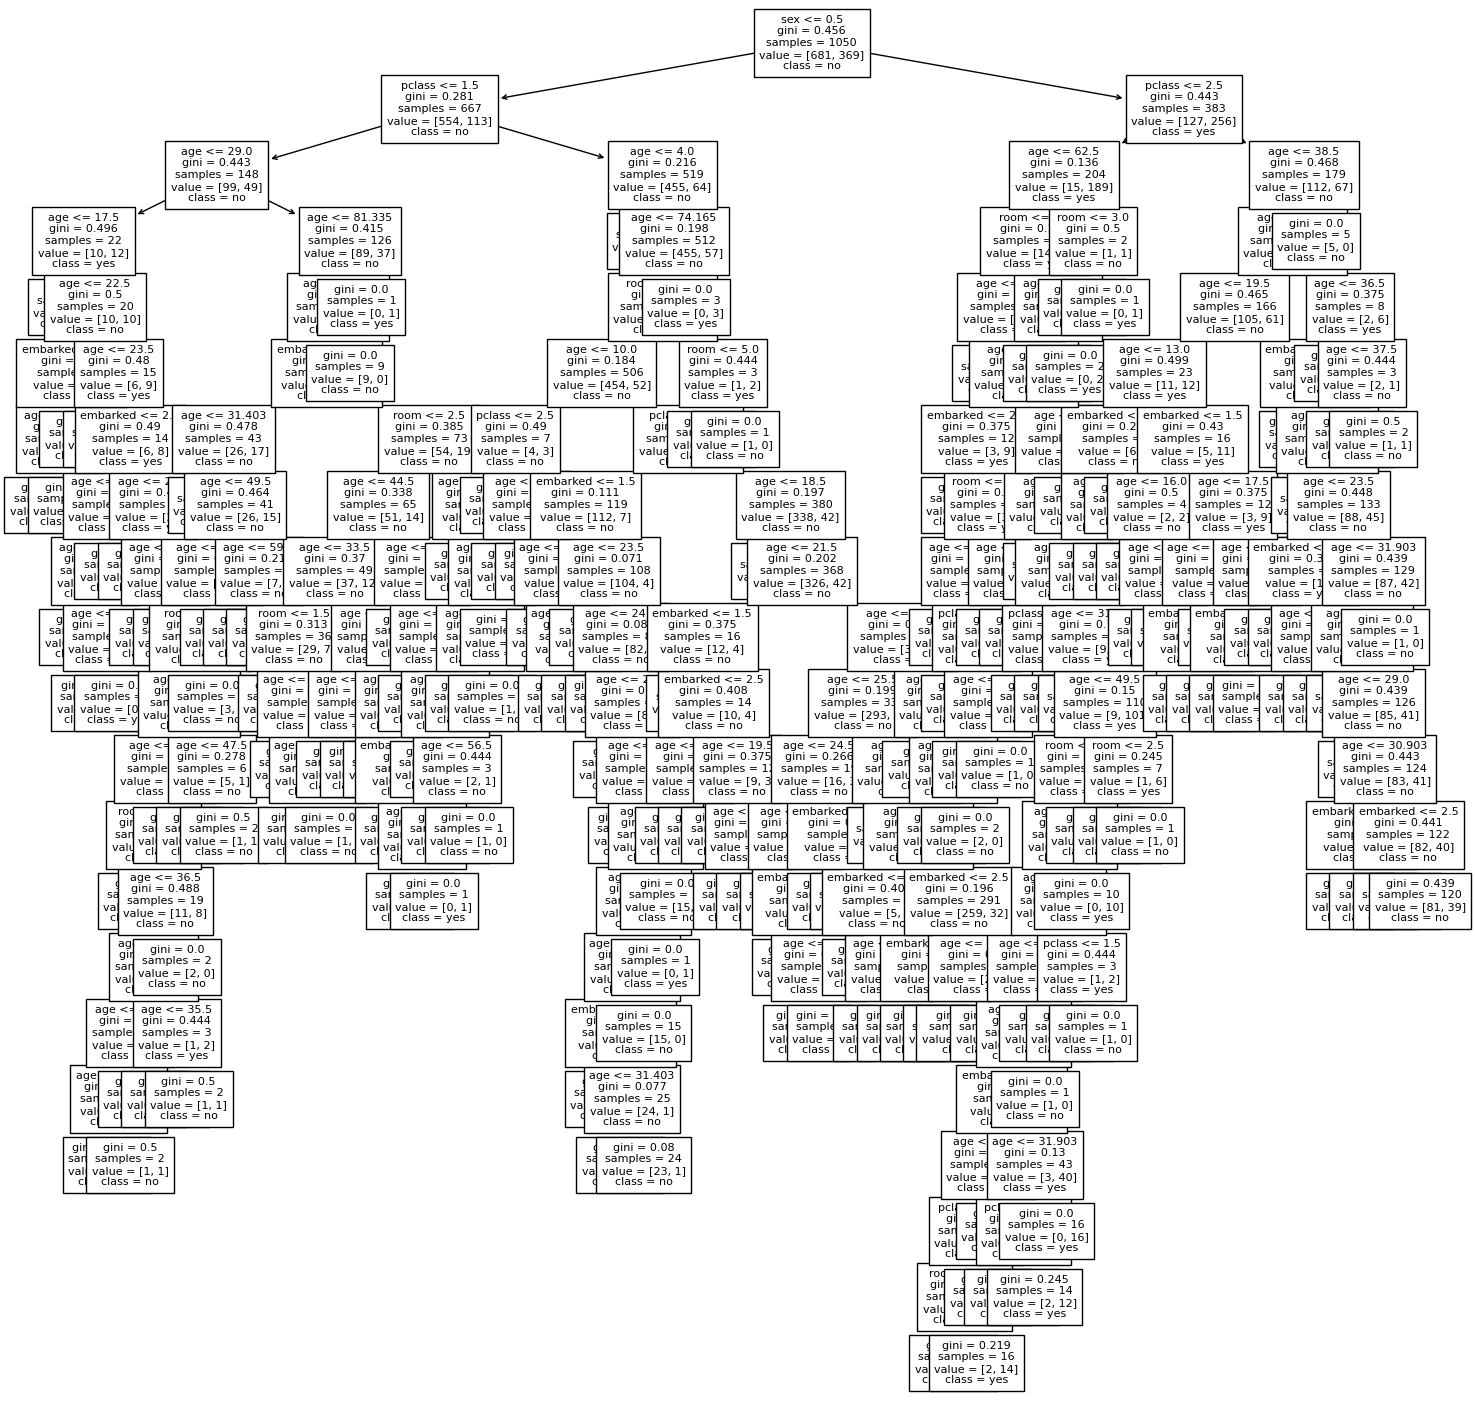

In [278]:
target_names = ["no", "yes"]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=8, feature_names=features, class_names=target_names)
plt.show()

In [279]:
from sklearn.metrics import classification_report

print("Train set:")
predictions = model.predict(X_train)
report = classification_report(y_train, predictions, target_names=target_names)
print(report)

print("Test set:")
predictions = model.predict(X_test)
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

Train set:
              precision    recall  f1-score   support

          no       0.86      0.98      0.91       681
         yes       0.96      0.69      0.80       369

    accuracy                           0.88      1050
   macro avg       0.91      0.84      0.86      1050
weighted avg       0.89      0.88      0.88      1050

Test set:
              precision    recall  f1-score   support

          no       0.83      0.94      0.88       183
         yes       0.80      0.55      0.65        80

    accuracy                           0.82       263
   macro avg       0.81      0.74      0.77       263
weighted avg       0.82      0.82      0.81       263



Instead of simply deleting all the features and "replacing" them I have created a model which has higher classification scores compared to the example excercise.


(example excercise results)
```
Train set:
              precision    recall  f1-score   support

          no       0.79      0.97      0.87       689
         yes       0.89      0.51      0.65       361

    accuracy                           0.81      1050
   macro avg       0.84      0.74      0.76      1050
weighted avg       0.82      0.81      0.79      1050

Test set:
              precision    recall  f1-score   support

          no       0.82      0.98      0.89       175
         yes       0.93      0.58      0.71        88

    accuracy                           0.84       263
   macro avg       0.87      0.78      0.80       263
weighted avg       0.86      0.84      0.83       263
```

however the accuracy score within the model itself in predicting whether someone would survive or not remained roughly the same. I think this could be explained by either the added features not to be relevant or the filling in of data by mean of the data set was not the "correct" decision.



one way to improve uppon this would be first to use number classifications when possibl and to take into account whether the location of the rooms had an impact on the survival rate by first comparing survival rate with the level of their appartment floor.

# inference

notes:

- age: numerical
- embarked: Cherbourg 1, Queenstown 2, Southampton 3
- pclass : high 1, med 2, low 3
- sex: men 0, female 1
- room: 123456 abcdef

as a 20yr woman in the first class embarked from cherbourg in room 1 you would have a survival rate of 100%.

In [318]:
import pandas
data = {"age":20, 
        "embarked": 1,
        "pclass": 1,
        "sex": 1,
        "room":1,
        }
X_inference = pandas.DataFrame([data])
prediction = model.predict_proba(X_inference)
result = pandas.DataFrame()
result["Outcome"] = target_names
result["Probability"] = prediction[0]
result

,Outcome,Probability
0,no,0.0
1,yes,1.0


as a man it drops it also gives us 100% which is plainly wrong

In [325]:
data = {"age":20, 
        "embarked": 1,
        "pclass": 1,
        "sex": 0,
        "room":1,
        }
X_inference = pandas.DataFrame([data])
prediction = model.predict_proba(X_inference)
result = pandas.DataFrame()
result["Outcome"] = target_names
result["Probability"] = prediction[0]
result

,Outcome,Probability
0,no,0.0
1,yes,1.0


as a man vs woman in 2nd class there is a clearer difference. I believe my model sucks as the survival rates are extreme and dont make sense unlike the example exercise

In [331]:
data = {"age":20, 
        "embarked": 1,
        "pclass": 2,
        "sex": 0,
        "room":1,
        }
X_inference = pandas.DataFrame([data])
prediction = model.predict_proba(X_inference)
result = pandas.DataFrame()
result["Outcome"] = target_names
result["Probability"] = prediction[0]
print("men",result)


data = {"age":20, 
        "embarked": 1,
        "pclass": 2,
        "sex": 1,
        "room":1,
        }
X_inference = pandas.DataFrame([data])
prediction = model.predict_proba(X_inference)
result = pandas.DataFrame()
result["Outcome"] = target_names
result["Probability"] = prediction[0]
print("woman",result)

men   Outcome  Probability
0      no          1.0
1     yes          0.0
woman   Outcome  Probability
0      no          0.0
1     yes          1.0


I think the reason why my model has these extreme predictions, it is due to the fact that it is modelled with too many feautures or filling in the missing data on which the model is trained on causing it to "halucinate" on its own biases since i have been using the mean to fill up the blanks quite often.